<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 1**

# QUESTÃO A

Média real da log-normal: 434.79
Desvio padrão real da log-normal: 129.77
Parâmetros da log-normal: 
 shape =  0.292
 loc = 102.642
 scale = 416.632


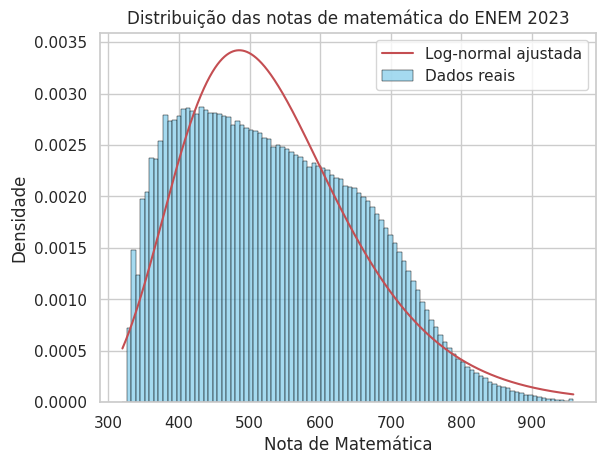

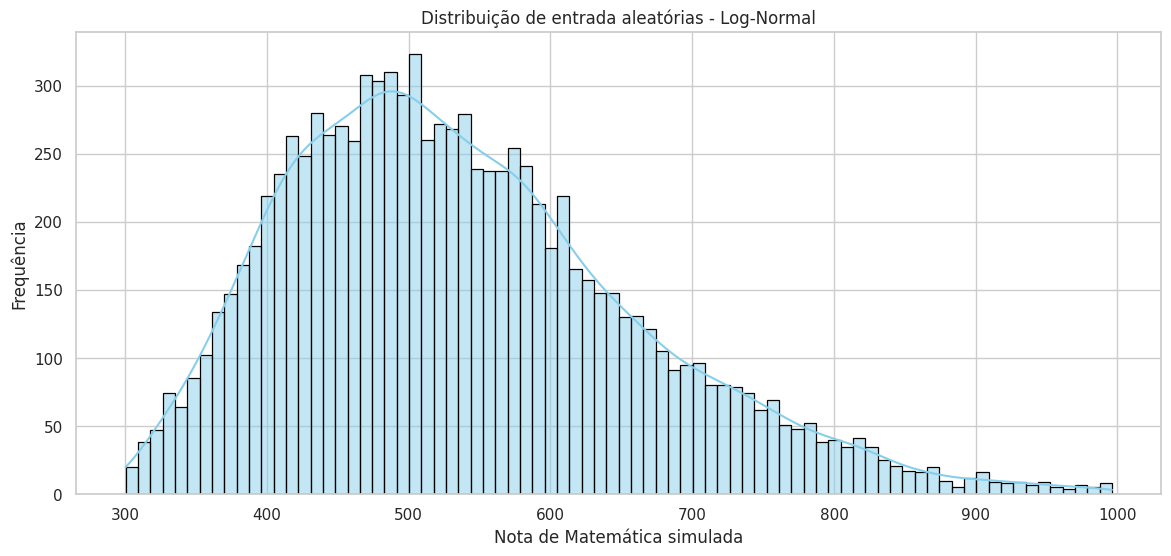

In [12]:
# Fenômeno representado: Notas obtidas por candidatos do ENEM na prova de Matemática

# Distribuição escolhida: Log-Normal

# Fonte: Microdados do ENEM 2023
# Link: https://download.inep.gov.br/microdados/microdados_enem_2023.zip

# Leitura dos dados CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/MICRODADOS_ENEM_2023.csv'

# Lendo somente a coluna de interesse do arquivo de microdados do ENEM 2023, referente à nota da prova de matemática(NU_NOTA_MT), para otimização de performance:

enem = pd.read_csv(path, usecols=['NU_NOTA_MT'], encoding='latin1', sep=';')

# Remover valores nulos e negativos/zero para cálculo de média e desvio-padrão

dados = enem['NU_NOTA_MT']
dados = dados.dropna()
dados = dados[dados > 0]

# Ajuste dos dados a uma distribuição log-normal
shape, loc, scale = lognorm.fit(dados)

# Calculando μ e σ (da normal associada)
sigma = shape
mu = np.log(scale)

# Média real da log-normal:
u = np.exp(mu + (sigma**2) / 2)

# Desvio padrão real da log-normal:
sd = np.sqrt((np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2))

print(f"Média real da log-normal: {u:.2f}")
print(f"Desvio padrão real da log-normal: {sd:.2f}")
print(f"Parâmetros da log-normal: \n shape =  {round(shape, 3)}\n loc = {round(loc, 3)}\n scale = {round(scale, 3)}")

# Geração do gráfico com o valor das notas de matemática do ENEM 2023: Histograma

# Histograma dos dados reais
sns.histplot(dados, bins=100, stat='density', color='skyblue', edgecolor='black', label='Dados reais')

# Gerar valores do eixo x
x = np.linspace(min(dados), max(dados), 10000)

# ajuste manual de parâmetros, para observar resposta da curva teórica (função densidade de probabilidade)

shape_adj = shape*1

loc_adj = loc*1

scale_adj = scale*1

pdf = lognorm.pdf(x, s=shape_adj, loc=loc_adj, scale=scale_adj)

# Plot da curva teórica (FDP)
plt.plot(x, pdf, 'r-', label='Log-normal ajustada')
plt.xlabel('Nota de Matemática')
plt.ylabel('Densidade')
plt.title('Distribuição das notas de matemática do ENEM 2023')
plt.legend()
plt.grid(True)
plt.show()
print()

# Definição do número de simulações:

n_sim = 10000

# Geração das entradas aleatoriamente respeitando-se a distribuição log-normal com a média e desvio-padrão obtidos a partir dos dados reais do Enem 2023.

entradas = []

entradas = lognorm.rvs(s=shape, loc=loc, scale=scale, size=n_sim)

# Normalizando para o intervalo esperado

min_nota_real = 300
max_nota_real = 1000

# Filtrar as entradas, mantendo apenas as que estão dentro do intervalo válido
entradas_filtradas = entradas[(entradas >= min_nota_real) & (entradas <= max_nota_real)]

# Geração do gráfico dos valores aleatórios seguindo uma distribuição log-normal, com a média e desvio-padrão obtidos dos dados reais.

plt.figure(figsize=(14, 6))
sns.histplot(entradas_filtradas, bins=80, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribuição de entrada aleatórias - Log-Normal')
plt.xlabel('Nota de Matemática simulada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


## Definição de uma possível pergunta problema:

#### Considerando que a distribuição das notas de Matemática no ENEM 2023 segue uma distribuição log-normal com média μ = 434.79 e desvio padrão σ = 129.77, responda a problemática abaixo.

## Problemática:

#### Para que um estudante seja competitivo na disputa por uma vaga no curso de Engenharia de Computação na Universidade de Brasília (UnB), é fundamental que sua nota de matemática esteja no intervalo entre 700 e 850 pontos.

#### Qual é a proporção esperada de candidatos que, com base no modelo de simulação, conseguiriam atingir uma nota dentro desse intervalo competitivo?

Proporção entre 700 e 850 pela CDF teórica: 8.5974%


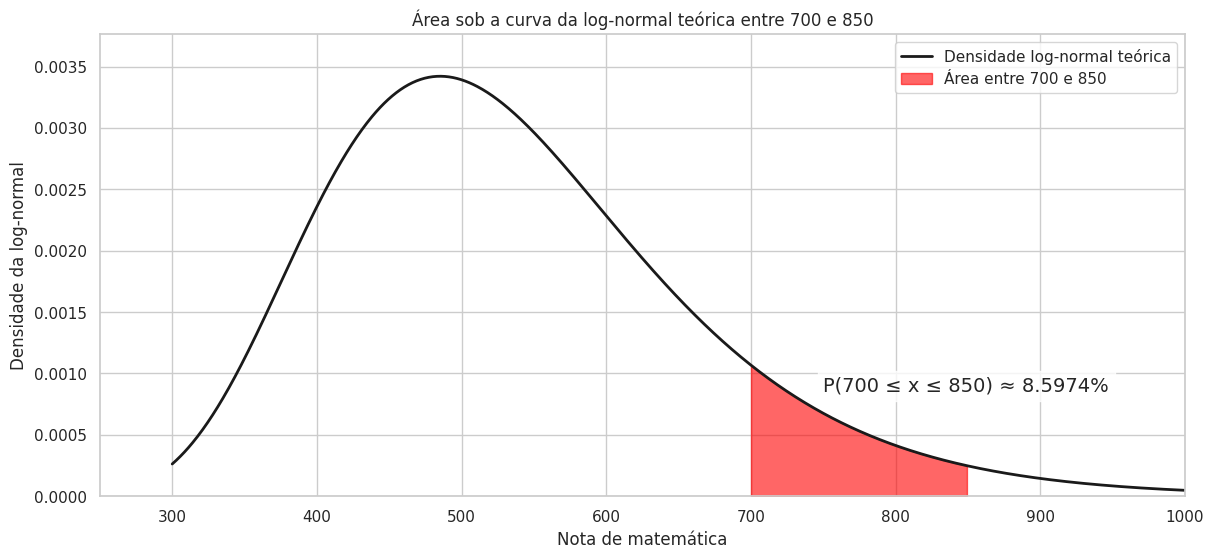

In [13]:
# # A resposta está na área sob a curva log-normal situada no intervalo entre 700 e 850 pontos.

# X(nota de matemática estar entre 700 e 850 pontos)
# variável aleatória f(x) = X(700 ≤ x ≤ 850)

from scipy.stats import lognorm

# Estimar a área sob a curva teórica: P(x ≤ 850) - P(x ≤ 700)
area = lognorm.cdf(850, s=shape, loc=loc, scale=scale) - lognorm.cdf(700, s=shape, loc=loc, scale=scale)
print(f"Proporção entre 700 e 850 pela CDF teórica: {100*area:.4f}%")

# Gerar eixo x e y da curva teórica
x = np.linspace(300, 1000, 1000)
pdf_teorica = lognorm.pdf(x, s=shape, loc=loc, scale=scale)

# Máscara para o intervalo do problema
mask = (x >= 700) & (x <= 850)

# Desenho da curva e preenchimento da área
plt.figure(figsize=(14, 6))
plt.plot(x, pdf_teorica, 'k-', linewidth=2, label='Densidade log-normal teórica')
plt.fill_between(x[mask], pdf_teorica[mask], color='red', alpha=0.6, label='Área entre 700 e 850')

# Ajuste de texto com a resposta teórica
plt.text(750, max(pdf_teorica)*0.25, f"P(700 ≤ x ≤ 850) ≈ {100*area:.4f}%", fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

# Estética
plt.title("Área sob a curva da log-normal teórica entre 700 e 850")
plt.xlabel("Nota de matemática")
plt.ylabel("Densidade da log-normal")
plt.xlim([250, 1000])
plt.ylim([0, max(pdf_teorica)*1.1])
plt.grid(True)
plt.legend()
plt.show()


# QUESTÃO B

## A apresentação detalhada dos fundamentos estatísticos da simulação, com justificativas formais para a escolha da distribuição utilizada, considerando suas propriedades, suposições e aderência ao contexto.

* A simulação tem como objetivo estudar a distribuição das notas dos candidatos na prova de matemática do Enem 2023, o que foi realizado mediante geração de simulações realistas para responder a uma situação problema formulada: "qual a chance de um candidato atingir entre 700 e 850 pontos?"

* Fundamentos da escolha da distribuição: a variável objeto de estudo - nota - é contínua, positiva e possui assimetria. A Teoria de Resposta ao Item (TRI) faz com que não se tenha notas situadas na cauda esquerda da distribuição, tendo início em aproximadamente 300 pontos. EM seguida, nota-se uma subida muito rápida, assim como a log-normal. Há um pico em aproximadamente 400 pontos e em seguida um lento decaimento, caracterizando uma cauda longa à direita, como também se observa na log-normal. A principal diferença observada entre a log-normal teórica e os dados reais obtidos do Enem é no formato do decaimento, sendo mais lento nos dados reais quando comparado à curva teórica. Apesar da diferença, a log-normal foi a distribuição escolhida que melhor representa o perfil de distribuição das notas de matemática do Enem 2023.

* Propriedades da Log-normal: Segundo Droubi et al. (2018), diz-se que uma variável aleatória X tem distribuição log-normal se o seu logaritmo ln(X) tem distribuição normal.

1.   Valor esperado: E[X] = e^(μ + (σ²/2))

2.   Variância: Var(X) = e^(2μ + σ²) * (e^σ² - 1)

* Essa distribuição permite representar bem caudas longas, conforme as notas do Enem se apresentam.

* A partir de então, foram obtidos os valores dos parâmetros da curva log-normal por meio da função lognorm.fit(dados), que ajustou a coluna que continha as notas de matemática do Enem 2023 a uma curva log-normal, atribuindo-se valores aos seguintes parâmetros:

1. Shape: afetado pelo desvio padrão, esse parâmetro determina o formato da curva, e não tem inferferência sobre o posicionamento no eixo x ou sobre a altura. No presente caso, shape = 0.292
2. Loc:  determina o deslocamento horizontal da curva sobre o eixo x. No presente caso, loc = 102.642
3. Scale: é a mediana dos dados. Relaciona-se à altura da curva. No presente caso, scale = 416.632

* A partir dos parâmetros obtidos ao se executar o fit nos dados reais, foram geradas entradas aleatórias utilizando-se os mesmos parâmetros, por meio da função lognorm.rvs(...) para calcular a probabilidade específica e responder à questão problema formulada.

* Também foi possível concluir que a distribuição log-normal é uma aproximação, pois não é totalmente aderente ao histograma dos dados reais, que possui calda longa menos pesada que a curva teórica.


## BIBLIOGRAFIA

(1) Droubi, Luiz Fernando Palin, Willian Zonato, and Norberto Hochheim. "Distribuição lognormal: propriedades e aplicações na engenharia de avaliações." Congresso de Cadastro Multifinalitário e Gestão Territorial, Florianópolis, Anais... SC. 2018.


# QUESTÃO C

## A análise crítica dos resultados obtidos via Simulação de Monte Carlo, com discussão sobre:

1. Como a distribuição escolhida impacta os resultados da simulação;
2. As implicações práticas e possíveis inferências decorrentes;
3. A sensibilidade dos resultados `as variações dos parâmetros da distribuição.

--

* A simulação só irá gerar entradas aleatórias legítimas se a distribuição escolhida for adequada para representar o fenônemo. No presente caso, como as principais distorções entre a curva real e teórica se encontram na faixa entre 650 e 750 pontos, com a curva real apresentando mais ocorrências desses valores quando comparado à curva teórica, sabe-se que as entradas aleatórias, que foram geradas a partir dos parâmetros da curva teórica, terão menos ocorrências do que deveria para essa faixa de valores. Quanto maior for a aderência dos dados reais à distribuição teórica, menor será esse erro na geração de entradas aleatórias.

* No presente contexto, foi possível utilizar os dados de toda a população para cálculo dos parâmetros da log normal e geração de entradas aleatórias a partir disso. Entretanto, esse não é o cenário usual, em que se possui apenas uma amostra da população para cálculo dos parâmetros da respectiva distribuição. Nesse caso, é possível criar a função densidade de probabilidade (FDP), a partir da amostra, que represente a população. Essa função pode ser usada para calcular probabilidades para vários tipos de problemas.

* No caso da log-normal, os parâmetros são o valor esperado e variância, que são obtidos a partir dos coeficientes pertencentes à curva normal associada a ela. Os resultados são diretamente afetados por diferentes valores de u e sd, que se relacionam aos coeficientes loc e shape respectivamente da função lognorm. Quanto maior o valor de u (loc), mais deslocada positivamente a curva estará com relação ao eixo y. Quanto maior o valor de sd (shape), mais "espalhada" estarão os dados com relação à moda (pico).

